# ANA 680 Assignment 2: ANN Model
## Kirsten Mattingly
### February 5, 2025
#### GitHub Link: https://github.com/kmattingly8/ANA680.git

In [1]:
# Import Churn Dataset

import pandas as pd

# Load data
df = pd.read_csv('/Users/kirsten/Churn_Modelling.csv')

In [2]:
# Explore dataset
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df = df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
# Explore values of Numeric Variables

df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
# Check for Missing Values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

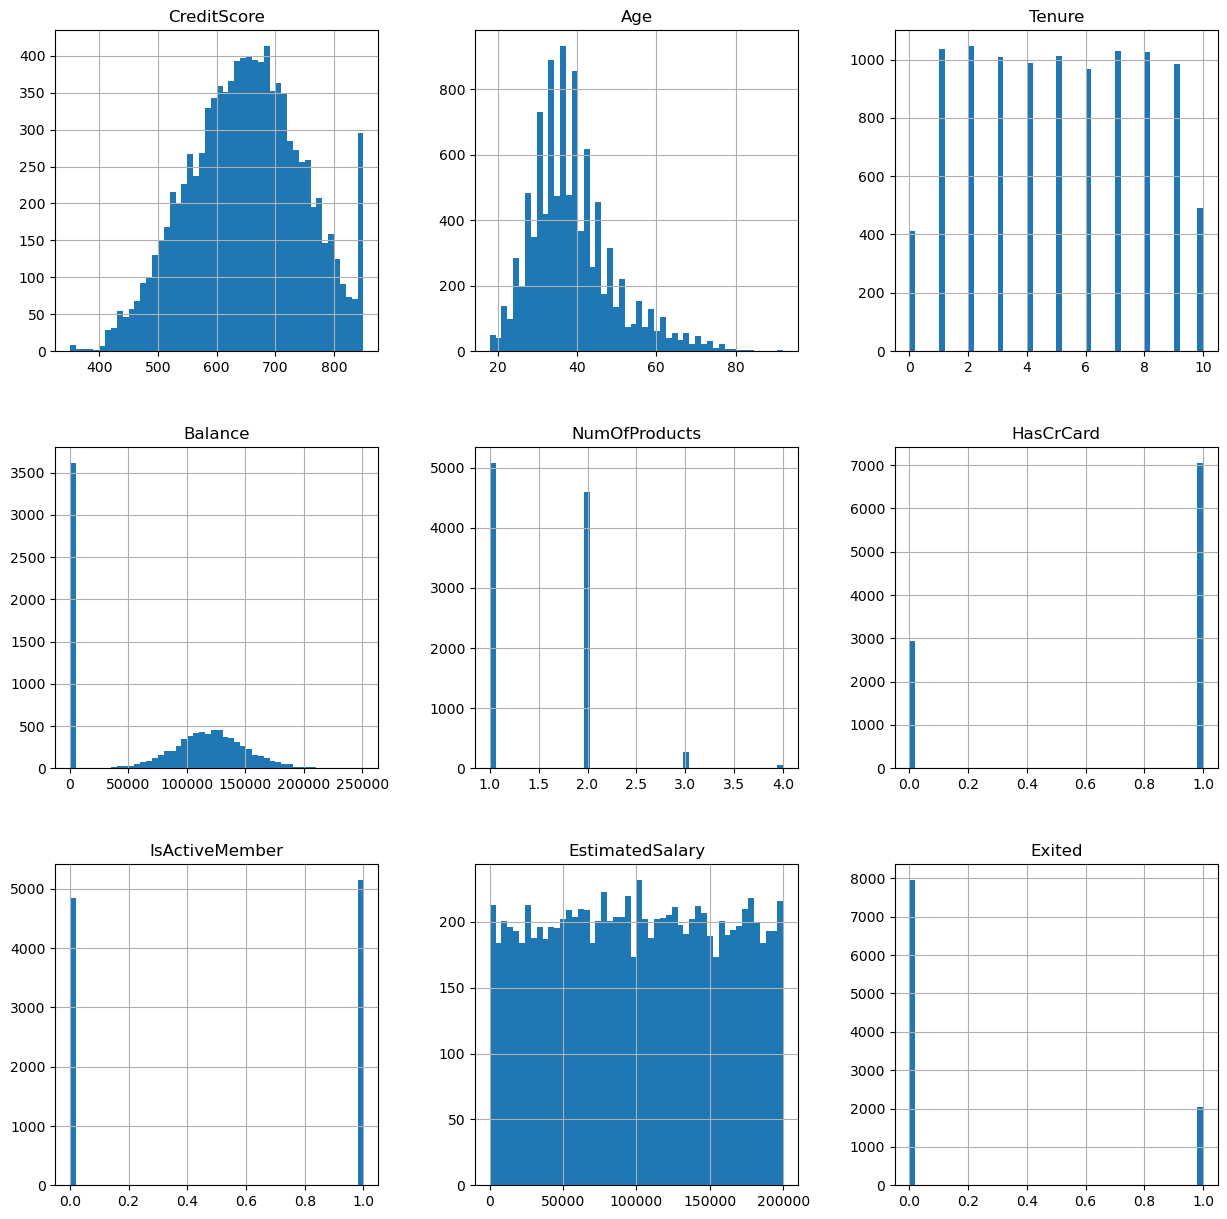

In [16]:
# histograms to show numeric variables distributions
df.hist(bins=50, figsize=(15, 15))

Balance variable has what seems like a lot of extreme values at $0, but it makes sense that any customer who had recently paid their bill would have $0 balance while the rest would constitute a more normal spread of balance values. Other distributions seem pretty logical. There are a good number of customers with a perfect credit score (850), so may skew the otherwise normal distribution of the CreditScore variable.

In [17]:
# Examine categorical variables

df.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [18]:
# Review values of categorial variables

df_cat = df.select_dtypes('object')
for col in list(df_cat):
  print("\n", df_cat[col].value_counts(dropna=False).to_string())


 Geography
France     5014
Germany    2509
Spain      2477

 Gender
Male      5457
Female    4543


In [19]:
# Recode binary outcome categorical variable to 0/1 values

df['Gender']= df['Gender'].map({'Male': 0, 'Female': 1})

In [31]:
# Use One Hot Encoding to turn categorical variable with 3+ values into dummy variables: 

df_encoded = pd.get_dummies(df, columns=['Geography']).astype(int)

df_encoded.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921800,5.012800,76485.571500,1.530200,0.70550,0.515100,100089.748400,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.185107,0.581654,0.45584,0.499797,57510.491042,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51001.750000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97198.000000,1.000000,1.00000,1.000000,100193.500000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127643.750000,2.000000,1.00000,1.000000,149387.750000,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.000000,4.000000,1.00000,1.000000,199992.000000,1.000000,1.000000,1.000000,1.000000


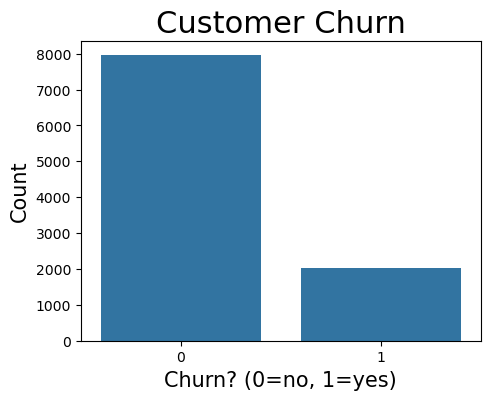

In [25]:
# Visualization of Target Variable: Exited (Churn)

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x ='Exited')
plt.title('Customer Churn', fontsize=22)
ax.set_xlabel("Churn? (0=no, 1=yes", fontsize=15)
ax.set_ylabel("Count", fontsize=15);

In [32]:
df_encoded.corr()['Exited'].sort_values(ascending = False)

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
Gender               0.106512
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Geography_France    -0.104955
IsActiveMember      -0.156128
Name: Exited, dtype: float64

Age and Geography_Germany are most positively correlated with churn (0.285 and 0.173), and IsActiveMember is most negatively correlated with churn (-0.156). 

In [44]:
# Break down Age into Categories
import numpy as np
df['AgeCat'] = np.where(df.Age < 30, 0, 
                              np.where(df.Age < 40, 1, 
                                       np.where(df.Age < 50, 2, 
                                                np.where(df.Age < 60, 3, 
                                                         np.where(df.Age < 70, 4,
                                                                 np.where(df.Age < 80, 5, 6))))))
                                                            
#Check New Variable
selected_columns = ['Age', 'AgeCat']
df[selected_columns].head(50)

,Age,AgeCat
0,42,2
1,41,2
2,42,2
3,39,1
4,43,2
5,44,2
6,50,3
7,29,0
8,44,2
9,27,0


/var/folders/rb/hbq90lbj0m705wt5bbtwzdl40000gn/T/ipykernel_11481/3645436209.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(level, rotation=0);


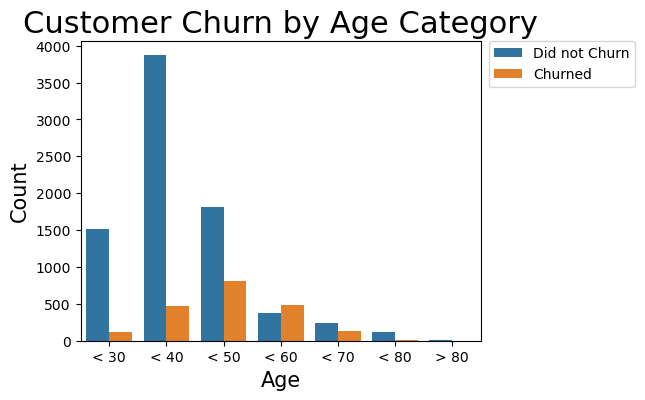

In [46]:
# Visualization of Churn by Age

level = ['< 30','< 40','< 50', '< 60', '< 70', '< 80', '> 80']

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'AgeCat', hue = 'Exited')
plt.legend(['Did not Churn', 'Churned'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Customer Churn by Age Category', fontsize=22)
ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
ax.set_xticklabels(level, rotation=0);

In [50]:
# Drop AgeCat variable again from dataset

df = df.drop(['AgeCat'], axis=1)

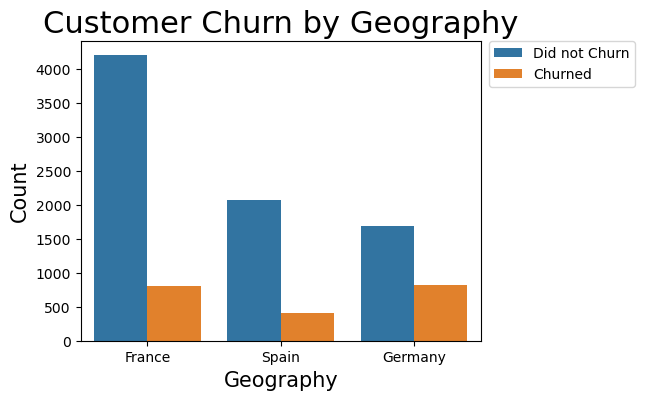

In [48]:
# Visualization of Churn by Geography

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Geography', hue = 'Exited')
plt.legend(['Did not Churn', 'Churned'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Customer Churn by Geography', fontsize=22)
ax.set_xlabel("Geography", fontsize=15)
ax.set_ylabel("Count", fontsize=15);

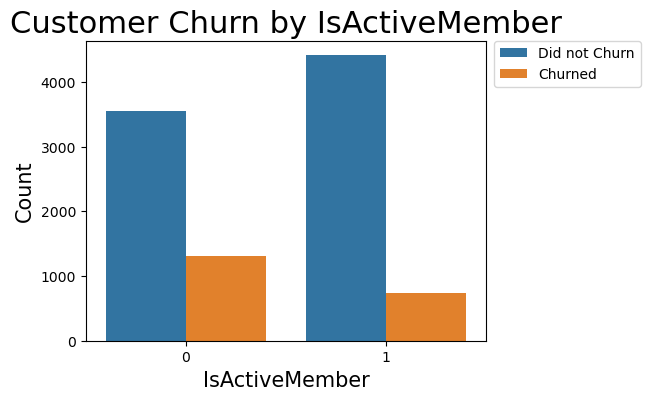

In [49]:
# Visualization of Churn by IsActiveMember

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'IsActiveMember', hue = 'Exited')
plt.legend(['Did not Churn', 'Churned'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Customer Churn by IsActiveMember', fontsize=22)
ax.set_xlabel("IsActiveMember", fontsize=15)
ax.set_ylabel("Count", fontsize=15);

In [51]:
# Scale all Variables to have values between 0 to 1 (normalize dataset); Normalization best because no extreme values

from sklearn.preprocessing import MinMaxScaler

# Define min max scaler
scaler = MinMaxScaler()

# Normalalize data
df_rescaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Print Head of Dataset to Review
df_rescaled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506733,1.0,1.0,0.0,0.0
1,0.516,1.0,0.310811,0.1,0.334028,0.000000,0.0,1.0,0.562708,0.0,0.0,0.0,1.0
2,0.304,1.0,0.324324,0.8,0.636354,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0
3,0.698,1.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0
4,1.000,1.0,0.337838,0.2,0.500243,0.000000,1.0,1.0,0.395403,0.0,0.0,0.0,1.0


In [52]:
df_rescaled.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.454300,0.282727,0.501280,0.304847,0.176733,0.70550,0.515100,0.500441,0.203700,0.501400,0.250900,0.247700
std,0.193307,0.497932,0.141727,0.289217,0.248695,0.193885,0.45584,0.499797,0.287580,0.402769,0.500023,0.433553,0.431698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.000000,0.189189,0.300000,0.000000,0.000000,0.00000,0.000000,0.254978,0.000000,0.000000,0.000000,0.000000
50%,0.604000,0.000000,0.256757,0.500000,0.387400,0.000000,1.00000,1.000000,0.500960,0.000000,1.000000,0.000000,0.000000
75%,0.736000,1.000000,0.351351,0.700000,0.508748,0.333333,1.00000,1.000000,0.746955,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# Split Dataset into Features and Target Sets

X = df_rescaled.drop(columns = ['Exited'])
y = df_rescaled['Exited'].values


# Split Dataset into Train/Test Splits stratifying according to target variable (to ensure similar levels of churn in training vs. testing)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 88, stratify=y)

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (8000, 12)
y_train.shape:  (8000,)
X_test.shape:  (2000, 12)
y_test.shape:  (2000,)


In [54]:
# Build Deep Learning Neural Network Model: ANN

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


2025-02-05 17:18:55.899964: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [60]:
# Build a 3-layer ANN
ann_model = Sequential()
ann_model.add(tf.keras.Input(shape=(12,))) # 12 input features
ann_model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and relu activation 
ann_model.add(Dense(32, activation='relu'))  # 2nd hidden layer with 32 neurons and relu activation
ann_model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid (binary classification)

# Compile model with optimizer and loss functions

ann_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

history_ann = ann_model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7552 - loss: 0.5286 - val_accuracy: 0.7955 - val_loss: 0.4657
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7958 - loss: 0.4709 - val_accuracy: 0.8060 - val_loss: 0.4459
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8077 - loss: 0.4495 - val_accuracy: 0.8130 - val_loss: 0.4295
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8171 - loss: 0.4302 - val_accuracy: 0.8220 - val_loss: 0.4191
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8234 - loss: 0.4231 - val_accuracy: 0.8295 - val_loss: 0.4111
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8321 - loss: 0.4054 - val_accuracy: 0.8355 - val_loss: 0.4028
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8280 - loss: 0.4056 - val_accuracy: 0.8360 - val_loss: 0.3896
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8392 - loss: 0.3903 - val_accuracy: 0.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8629 - loss: 0.3459

Final ANN model validation loss: 0.3525
Final ANN model validation accuracy: 0.8610



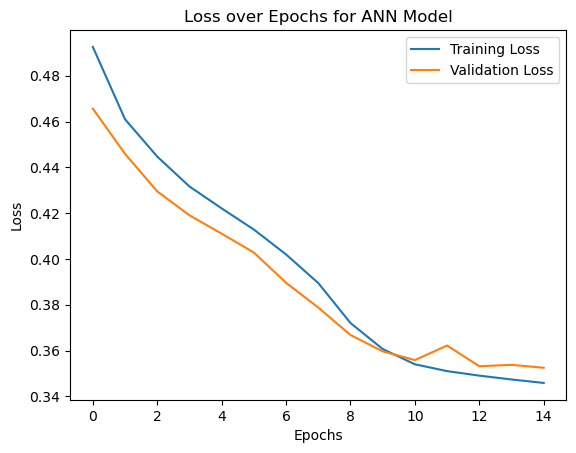

In [61]:
# Plot the Loss over Epochs chart
plt.plot(history_ann.history['loss'], label='Training Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs for ANN Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Evaluate the model
loss_ann, accuracy_ann = ann_model.evaluate(X_test, y_test)
print(f"\nFinal ANN model validation loss: {loss_ann:.4f}")
print(f"Final ANN model validation accuracy: {accuracy_ann:.4f}\n")

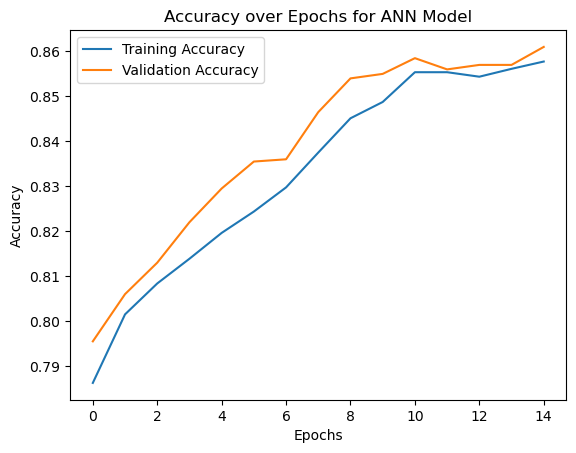

In [62]:
# Plot the Accuracy over Epochs chart
plt.plot(history_ann.history['accuracy'], label='Training Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs for ANN Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [63]:
# Use Model to Make Predictions on Test Data
# Make predictions on test data
y_pred_ann = ann_model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5).astype(int)  # Convert the predictions to 0 or 1 with threshold at 0.5 for binary classification

print("\nPredictions:")
for i in range(24):
    print(f"Predicted Churn Value: {y_pred_ann[i][0]}, Actual Churn Value: {y_test[i]}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Predictions:
Predicted Churn Value: 1, Actual Churn Value: 1.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 1, Actual Churn Value: 1.0
Predicted Churn Value: 0, Actual Churn Value: 1.0
Predicted Churn Value: 1, Actual Churn Value: 1.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 1, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 1, Actual Churn Value: 1

ANN Confusion Matrix: 
[[1534   59]
 [ 219  188]]


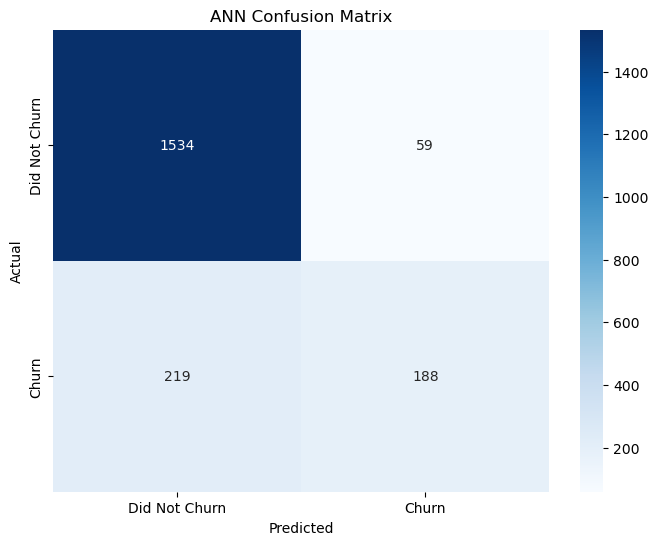


ANN Classification Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1593
         1.0       0.76      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [64]:
from sklearn.metrics import confusion_matrix, classification_report

# Create a Confusion Matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
print("ANN Confusion Matrix: ")
print(conf_matrix_ann)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=["Did Not Churn", "Churn"], yticklabels=["Did Not Churn", "Churn"])
plt.title("ANN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Generate a Classification Report
class_report_ann = classification_report(y_test, y_pred_ann)
print("\nANN Classification Report: ")
print(class_report_ann)